# Lesson: Clustering - DATA WRANGLING
<a href = "https://ds.codeup.com/clustering/wrangle/">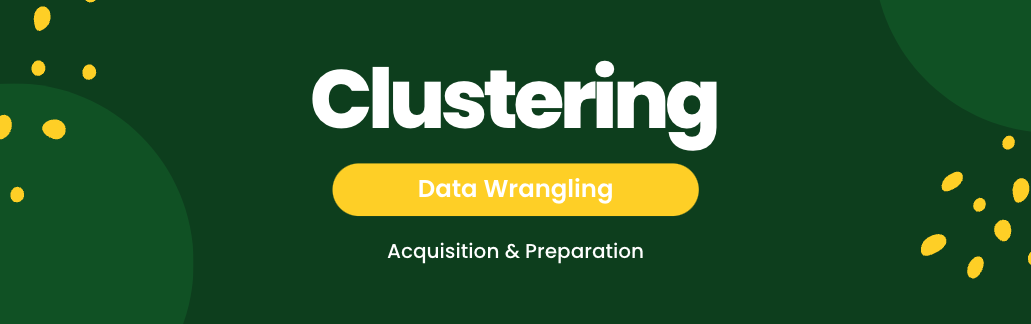</a>

<hr style="border:2px solid gray">

### Imports:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# houses my function to connect to Codeup DB
import wrangle as w

# Acquire & Summarize

In [ ]:
def get_mallcustomer_data():
    """
    This function will:
        - read the given `sql_query`
        - from the connection made to the `mall_customers` DB
            - using the `get_connection_url` from my wrangle module.
            
        - output a df with the mall `customer_id` set as it's index
                - `customer_id` is the table's PK. 
                    This id is an attribute of the table but will not be used as a feature to investigate.
    """
    
    sql_query = 'SELECT * FROM customers;'
    url = w.get_connection_url('mall_customers')
    
    df = pd.read_sql(sql_query, url)
    
    return df.set_index('customer_id')

In [ ]:
get_mallcustomer_data()

<div class="alert alert-warning" role="alert">
    
### Initial Investigation:
**Always want to check these things:**
- `.head()`
- `.info()`
- `.describe()`
- `.isnull()`
- possibles: 
    - `value_counts` for anything deemed categorical
    - distribution of numerical attributes
    
</div>

In [ ]:
# I always want to take a sneak peek at my data before moving fwd.
# Using .head()



In [ ]:
# And .info()



<div class="alert alert-success" role="alert">
    
### Takeaways:    
    
</div>

In [ ]:
# Provides an aggregated sum of nulls by column
    #the default axis = 0 : r0w
    #so it's summing all r0ws



In [ ]:
def nulls_by_col(df):
    """
    This function will:
        - take in a dataframe
        - assign a variable to a Series of total row nulls for ea/column
        - assign a variable to find the percent of rows w/nulls
        - output a df of the two variables.
    """
    num_missing = df.isnull().sum()
    pct_miss = (num_missing / df.shape[0]) * 100
    cols_missing = pd.DataFrame({
                    'num_rows_missing': num_missing,
                    'percent_rows_missing': pct_miss
                    })
    
    return  cols_missing

In [ ]:
# Let's examine by row now!
    #now that we've changed the axis=1: co1
    #it's summing the columns



In [ ]:
# Our function will look a little different:

num_missing = 
pct_miss = (num_missing / df.shape[1]) * 100

In [ ]:
# Creating df to house it will look the same



In [ ]:
def nulls_by_row(df, index_id = 'customer_id'):


In [ ]:
def get_object_cols(df):
    '''
    This function takes in a dataframe and identifies the columns that are object types
    and returns a list of those column names. 
    '''
    # get a list of the column names that are objects (from the mask)
    object_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
    
    return object_cols



def get_numeric_cols(df):
    '''
    This function takes in a dataframe and identifies the columns that are object types
    and returns a list of those column names. 
    '''
    # get a list of the column names that are objects (from the mask)
    num_cols = df.select_dtypes(exclude=['object', 'category']).columns.tolist()
    
    return num_cols

In [ ]:
get_object_cols(df)

In [ ]:
get_numeric_cols(df)

<div class="alert alert-success" role="alert">
    
### Univariate Takeaways:    
   
</div>

In [ ]:
def summarize(df):
    '''
    summarize will take in a single argument (a pandas dataframe) 
    and output to console various statistics on said dataframe, including:
    # .head()
    # .info()
    # .describe()
    # .value_counts()
    # observation of nulls in the dataframe
    '''
    print(f"""SUMMARY REPORT
=====================================================
          
          
Dataframe head: 
{df.head(3)}
          
=====================================================
          
          
Dataframe info: """)
    df.info()

    print(f"""=====================================================
          
          
Dataframe Description: 
{df.describe()}
          
=====================================================


nulls in dataframe by column: 
{nulls_by_col(df)}
=====================================================


nulls in dataframe by row: 
{nulls_by_row(df)}
=====================================================
    
    
DataFrame value counts: 
 """)         
    for col in (get_object_cols(df)): 
        print(f"""******** {col.upper()} - Value Counts:
{df[col].value_counts()}
    _______________________________________""")                   
        
    fig, axes = plt.subplots(1, len(get_numeric_cols(df)), figsize=(15, 5))
    
    for i, col in enumerate(w.get_numeric_cols(df)):
        sns.histplot(df[col], ax = axes[i])
        axes[i].set_title(f'Histogram of {col}')
    plt.show()
        

## Summary complete, time to prep

In [ ]:
def remove_columns(df, cols_to_remove):
    """
    This function will:
    - take in a df and list of columns
    - drop the listed columns
    - return the new df
    """
    df = df.drop(columns=cols_to_remove)
    return df

In [ ]:
def handle_missing_values(df, prop_required_columns=0.5, prop_required_rows=0.75):
    """
    This function will:
    - take in: 
        - a dataframe
        - column threshold (defaulted to 0.5)
        - row threshold (defaulted to 0.75)
    - calculates the minimum number of non-missing values required for each column/row to be retained
    - drops columns/rows with a high proportion of missing values.
    - returns the new df
    """
    
    column_threshold = int(round(prop_required_columns * len(df.index), 0))
    df = df.dropna(axis=1, thresh=column_threshold)
    
    row_threshold = int(round(prop_required_rows * len(df.columns), 0))
    df = df.dropna(axis=0, thresh=row_threshold)
    
    return df

In [ ]:
def data_prep(df, col_to_remove=[], prop_required_columns=0.5, prop_required_rows=0.75):
    """
    This function will:
    - take in: 
        - a dataframe
        - list of columns
        - column threshold (defaulted to 0.5)
        - row threshold (defaulted to 0.75)
    - removes unwanted columns
    - remove rows and columns that contain a high proportion of missing values
    - returns cleaned df
    """
    df = remove_columns(df, col_to_remove)
    df = handle_missing_values(df, prop_required_columns, prop_required_rows)
    return df

In [ ]:
# Adjust as you see fit.

df = prepare.data_prep(
    df,
    cols_to_remove=[],
)

___
### Wrangle status check:
 - acquired our data
 - checked for null values
 - observed basic data summary
 - observed univariate data spread

**To Do:**

🔲 Outlier checks

🔲 Any extra data cleaning

# Outliers

<a href = "https://www.kdnuggets.com/2019/11/understanding-boxplots.html">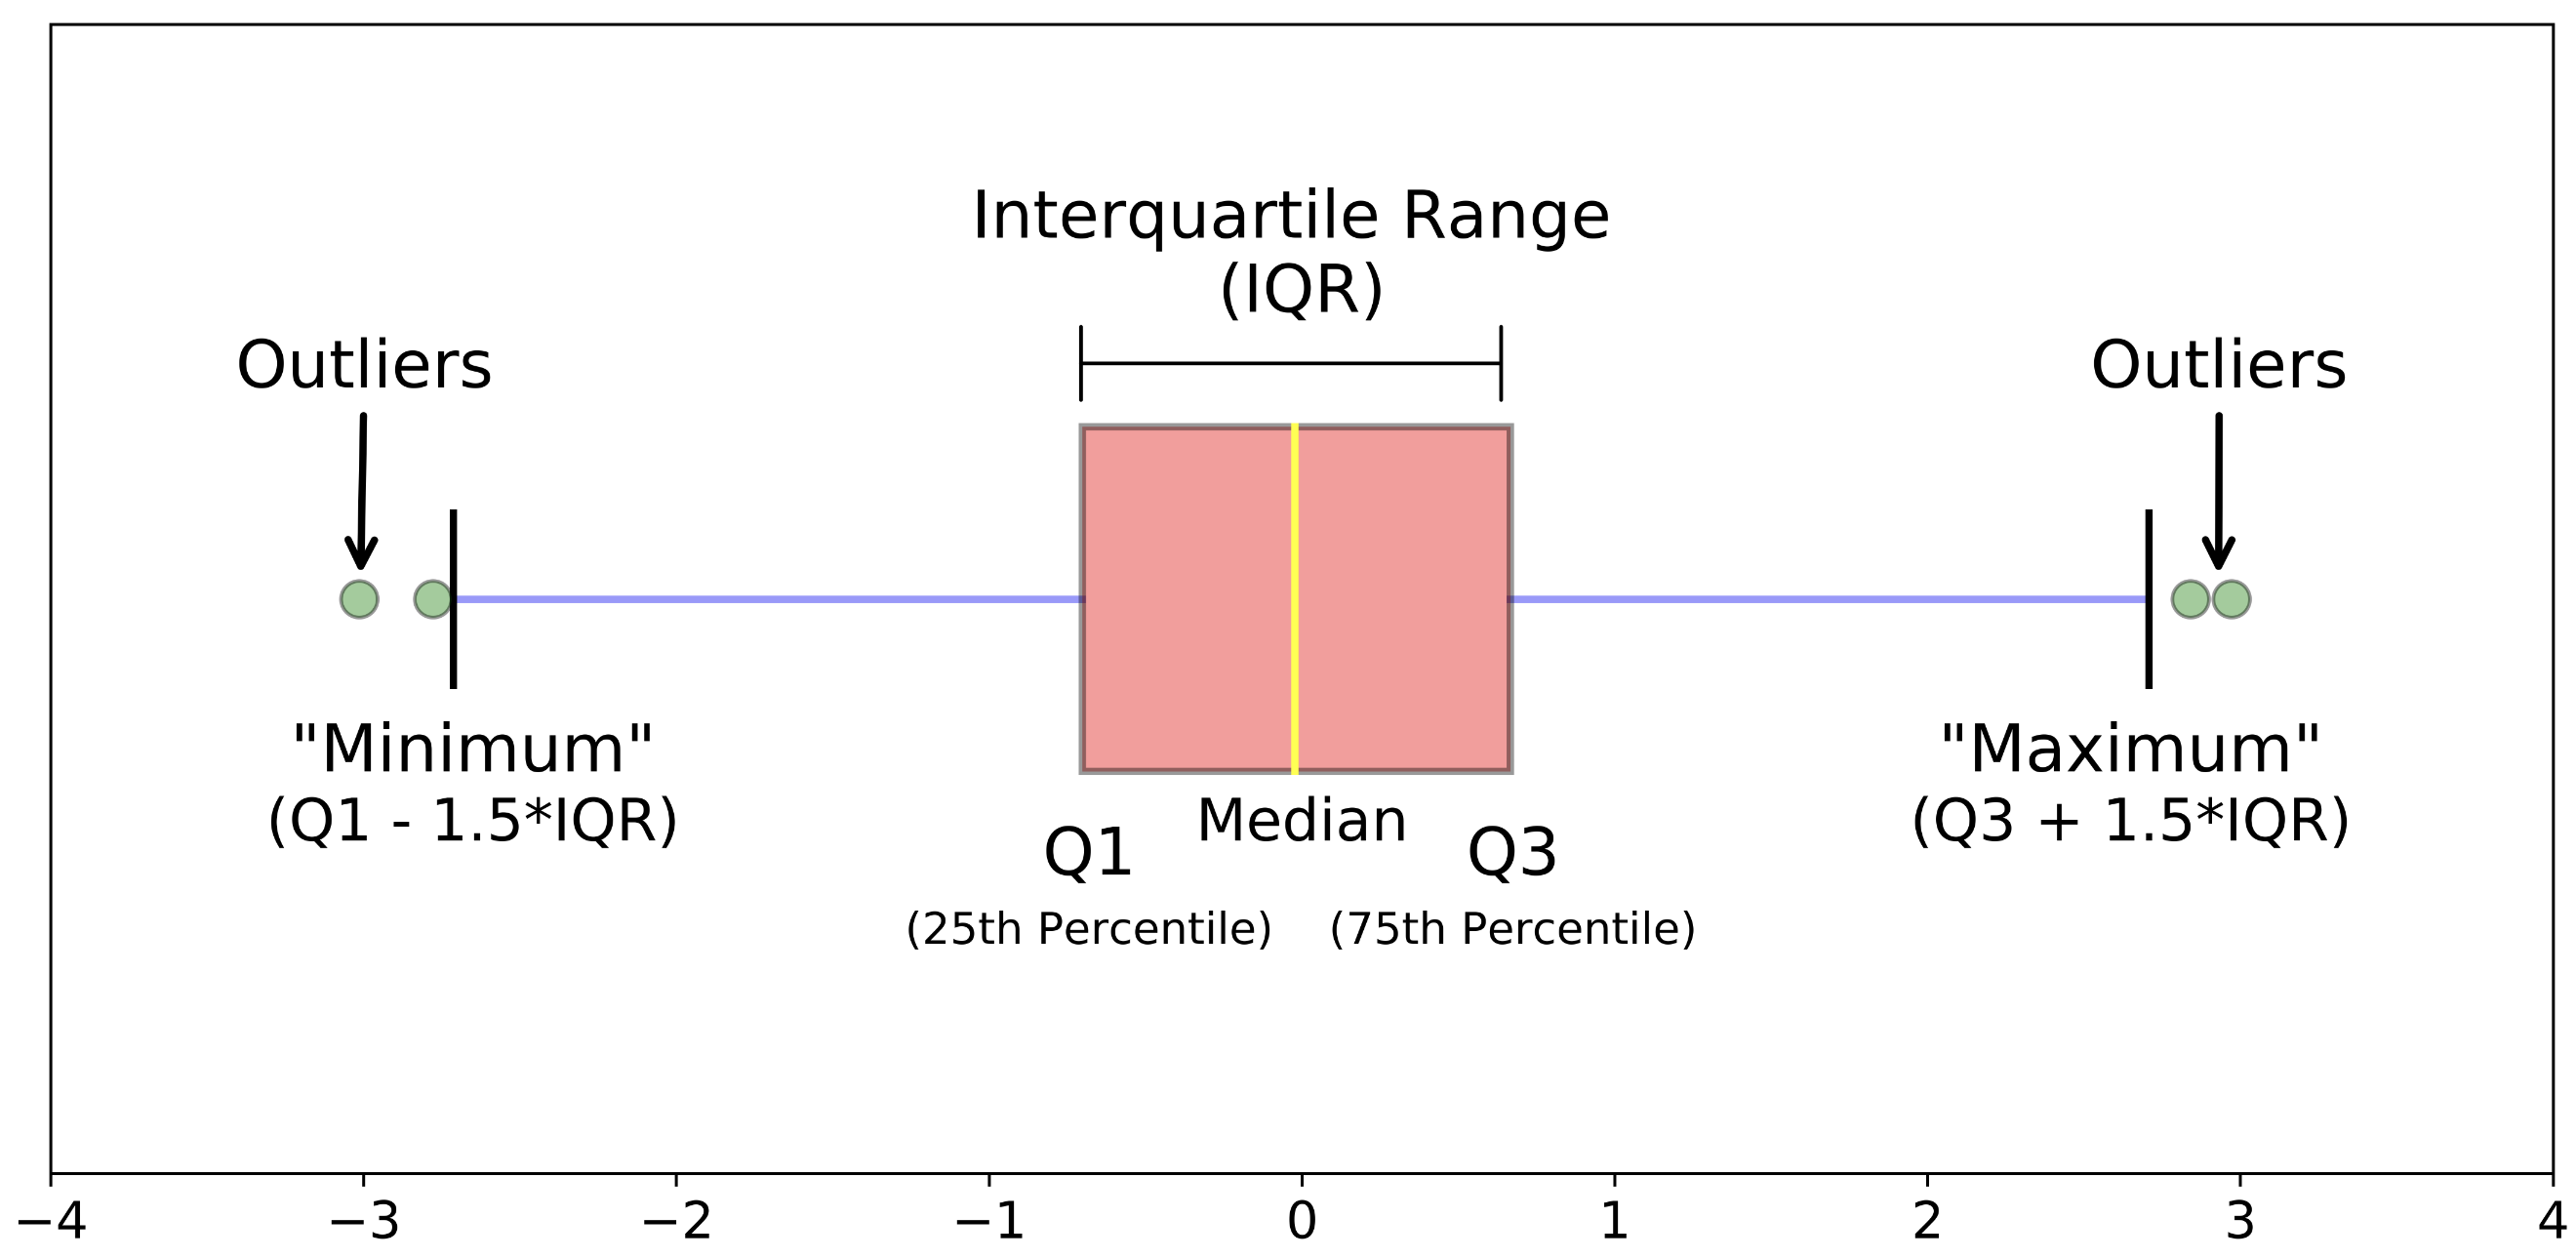</a>




### Tukey's Multiplier

Mathematician John Tukey invented the boxplot in 1970 and he picked $$1.5 * IQR$$ as the demarkation line for outliers. The boxplot is another way of visualizing distribution. 

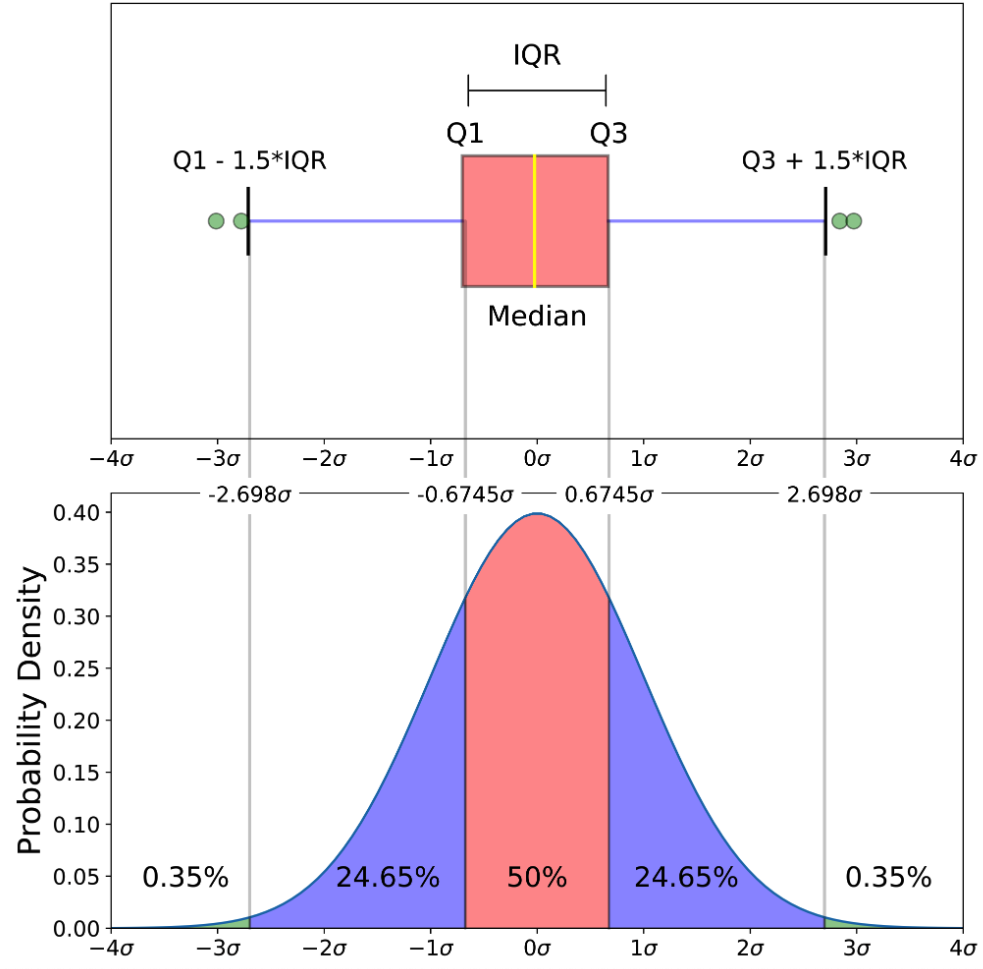

Since the IQR accounts for 50% of the data (1 quarter + 1 quarter = 50), the regular standard deviation (σ) was shifted from 1σ to 0.6745σ. 

As we add 0.6745σ (3 times to be exact), we finally reach the end of our whisker at 2.698σ. Incidentally this length, starting at Q3, is equivalent to`1.5(IQR)` or three-halves of the IQR.

Therefore, we say use the following formulas:
$$UpperBound = Q3 + (m * IQR) \\
\text {&}\\
LowerBound = Q1 - (m * IQR)$$


Let's use a few functions provided in the text.

In [ ]:
def get_upper_outliers(s, m=1.5):
    '''
    Given a series and a cutoff value, k, returns the upper outliers for the
    series.

    The values returned will be either 0 (if the point is not an outlier), or a
    number that indicates how far away from the upper bound the observation is.
    '''
    q1, q3 = s.quantile([.25, 0.75])
    iqr = q3 - q1
    upper_bound = q3 + (m * iqr)
    
    return s.apply(lambda x: max([x - upper_bound, 0]))

In [ ]:
def add_upper_outlier_columns(df, m=1.5):
    '''
    Add a column with the suffix _outliers for all the numeric columns
    in the given dataframe.
    '''
    for col in df.select_dtypes('number'):
        df[col + '_outliers_upper'] = get_upper_outliers(df[col], m)
    return df

In [ ]:
outlier_cols = [col for col in df.columns if col.endswith('_outliers_upper')]

for col in outlier_cols:
    subset = df[col][df[col] > 0]
    print(f"""{col} : 
Number of Observations Above Upper Bound: {subset.count()}
          
{subset.describe()}
------
         """)

In [ ]:
def outlier(df, feature, m=1.5):
    '''
    outlier will take in a dataframe's feature:
    - calculate it's 1st & 3rd quartiles,
    - use their difference to calculate the IQR
    - then apply to calculate upper and lower bounds
    - using the `m` multiplier
    '''
    q1 = df[feature].quantile(.25)
    q3 = df[feature].quantile(.75)
    
    iqr = q3 - q1
    
    upper_bound = q3 + (m * iqr)
    lower_bound = q1 - (m * iqr)
    
    return upper_bound, lower_bound

In [ ]:
# There are only two instances of annual_income UPPER outliers


In [ ]:
# There are no LOWER outliers


## Handling Outliers

In [ ]:
# Filter dataframe using multiple conditions



In [ ]:
# Cap the limit

# df['column'] = np.where(this_is_true(?), do_this, else_do_that)



In [ ]:
df[['annual_income','annual_income_capped']].hist(figsize=(12,5), bins=20)
plt.show()

<hr style="border:2px solid gray">

# Exercises

Within your `codeup-data-science` directory, using the repo [setup directions](https://ds.codeup.com/fundamentals/git/), setup a new local and remote repository named `clustering-exercises`. This will be where you do your work for this module. Create a repository on GitHub with the same name, and link your local repository to GitHub.

Save your clustering work in your `clustering-exercises` repo. Then add, commit, and push your changes.

For example, if the
exercise directs you to create a file named `myfile.py`, you should have
`clustering/myfile.py` in your repository.

If a file extension is specified, you should create that specific file. If there
is not file extension specified, you may either create a python script or a
jupyter notebook for the exercise.

<div class="alert alert-warning" role="alert">


## 🔥 Workflow
    
Throughout the exercises, you may wish to do your work in a notebook, then
transfer any functions you've created to an external python script.

Keep in mind this is not always a linear process! You will probably be
cycling between a notebook and an external python script frequently.

Remember to run your code often to check for correct output and/or errors.
</div>

    
## Acquire (acquire.py)

### Zillow

For the following, iterate through the steps you would take to create functions:
Write the code to do the following in a jupyter notebook, test it, convert to functions, then create the file to house those functions. 

You will have a `zillow.ipynb` file and a helper file for each section in the pipeline. 


#### Acquire & Summarize

1. Acquire data from mySQL using the python module to connect and query. You will want to end with a single dataframe. Make sure to include: the logerror, all fields related to the properties that are available. You will end up using all the tables in the database. 
    - **_Be sure to do the correct join (inner, outer, etc.). We do not want to eliminate properties purely because they may have a null value for `airconditioningtypeid`._**  
    - Only include properties with a transaction in 2017, and include only the last transaction for each property (so no duplicate property ID's), along with zestimate error and date of transaction.  
    - Only include properties that include a latitude and longitude value.  

2. Summarize your data (summary stats, info, dtypes, shape, distributions, value_counts, etc.)
3. Write a function that takes in a dataframe of observations and attributes and returns a dataframe where each row is an atttribute name, the first column is the number of rows with missing values for that attribute, and the second column is percent of total rows that have missing values for that attribute. Run the function and **document takeaways** from this on how you want to handle missing values. 

|                          | num_rows_missing | pct_rows_missing  |
| ------------------------ |-----------------:| -----------------:|
| parcelid                 | 0                | 0.000000          |
| airconditioningtypeid    | 29041            | 0.535486          |
| architecturalstyletypeid | 54232            | 0.999982          |


4. Write a function that takes in a dataframe and returns a dataframe with 3 columns: the number of columns missing, percent of columns missing, and number of rows with n columns missing. Run the function and document takeaways from this on how you want to handle missing values. 


| num_cols_missing  | pct_cols_missing | num_rows  |
| ----------------- |-----------------:| ---------:|
| 23                | 38.333           | 108       |
| 24                | 40.000           | 123       |
| 25                | 41.667           | 5280      |

#### Prepare 

1. Remove any properties that are likely to be something other than single unit properties. (e.g. no duplexes, no land/lot, ...). There are multiple ways to estimate that a property is a single unit, and there is not a single "right" answer. 

1. Create a function that will drop rows or columns based on the percent of values that are missing: `handle_missing_values(df, prop_required_column, prop_required_row)`.  
    - The input:
        - A dataframe
        - A number between 0 and 1 that represents the proportion, for each column, of rows with non-missing values required to keep the column.  i.e. if prop_required_column = .6, then you are requiring a column to have at least 60% of values not-NA (no more than 40% missing).
        - A number between 0 and 1 that represents the proportion, for each row, of columns/variables with non-missing values required to keep the row. For example, if prop_required_row = .75, then you are requiring a row to have at least 75% of variables with a non-missing value (no more that 25% missing). 
    - The output:
        - The dataframe with the columns and rows dropped as indicated. *Be sure to drop the columns prior to the rows in your function.*
    - hint:
        - Look up the `dropna` documentation. 
        - You will want to compute a threshold from your input values (prop_required) and total number of rows or columns.
        - Make use of inplace, i.e. inplace=True/False.

1. Encapsulate your work inside of functions in a `wrangle_zillow.py` module.